In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_1 = pd.read_csv("train.csv")
df_1.head(10)

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive
7,50e14c0bb8,Soooo high,neutral
8,e050245fbd,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [4]:
#Checking whether there are any rows with null values
nan_rows = df_1[df_1.isnull().any(1)]
print (nan_rows)



         textID text sentiment
314  fdb77c3752  NaN   neutral


In [5]:
df_1.isnull().sum()

textID       0
text         1
sentiment    0
dtype: int64

In [6]:
# Filling the null values with ' '

df_1 = df_1.fillna(" ")

In [7]:
print("Number of data points:",df_1.shape[0])

Number of data points: 27481


In [8]:
df_1.sentiment.value_counts()


neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment'>

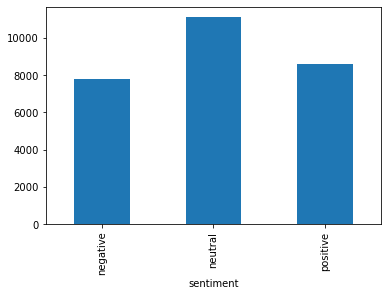

In [9]:
#Distribution of data points
df_1.groupby("sentiment")['textID'].count().plot.bar()


In [10]:
def removeApostrophe(x):
    x = re.sub("won\`t", "will not", x)
    x = re.sub("can\`t", "can not", x)
    x = re.sub(r"couldn\`t", "could not", x)
    x = re.sub("wouldn\`t", "would not", x)
    x = re.sub("n\`t", " not", x)
    x = re.sub("\`re", " are", x)
    x = re.sub(r"\`s", " is", x)
    x = re.sub("\`d", " would", x)
    x = re.sub(r"\`ll", " will", x)
    x = re.sub(r"\`t", " not", x)
    x = re.sub(r"\`ve", " have", x)
    x = re.sub(r"\`m", " am", x)
    return x



def removeHTMLTags(x):
    soup = BeautifulSoup(x, 'lxml')
    return soup.get_text()


def removeSpecialChars(x):
    return re.sub('[^a-zA-Z]', ' ', x)

def removeurl(x):
    x = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x, flags=re.MULTILINE)
    return(x)


def removeAlphaNumericWords(x):
    return re.sub("\S*\d\S*", "", x).strip()

In [11]:
df_1["text"] = df_1["text"].apply(removeurl)
df_1["text"] = df_1["text"].apply(removeHTMLTags)
df_1["text"] = df_1["text"].apply(removeApostrophe)
df_1["text"] = df_1["text"].apply(removeAlphaNumericWords)
df_1["text"] = df_1["text"].apply(removeSpecialChars)



In [12]:
df_1["text"].head(10)

0              I would have responded  if I were going
1        Sooo SAD I will miss you here in San Diego   
2                            my boss is bullying me   
3                       what interview  leave me alone
4    Sons of       why could not they put them on t...
5      some shameless plugging for the best Rangers...
6    feedings for the baby are fun when he is all s...
7                                           Soooo high
8                                          Both of you
9    Journey   Wow    u just became cooler   hehe  ...
Name: text, dtype: object

In [13]:
# Lower casing & Tokenization 
df_1['text'] = df_1['text'].str.strip().str.lower()

In [14]:
def dostemming(x):

    #Removing Stopwords and Lemmatization
    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
      
    return x



In [15]:
df_1["text"] = df_1["text"].fillna("").apply(dostemming)

In [16]:
df_1["text"].head(10)

0                 i would have responded  if i were go
1           sooo sad i will miss you here in san diego
2                                my boss is bullying m
3                        what interview  leave me alon
4    sons of       why could not they put them on t...
5    some shameless plugging for the best rangers f...
6    feedings for the baby are fun when he is all s...
7                                           soooo high
8                                            both of y
9    journey   wow    u just became cooler   hehe  ...
Name: text, dtype: object

In [18]:
#Adding Polarity to Y values 

df_1['sentiment'].replace(['neutral', 'negative', 'positive'], [0, 1, -1], inplace=True)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df_1["text"])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_1['sentiment'], test_size=0.25, random_state=5)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [25]:


from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)



In [26]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

63.50%


In [28]:
#Checking with different ngram 

cv = CountVectorizer(stop_words='english', ngram_range = (2,2), tokenizer = token.tokenize)
text_counts = cv.fit_transform(df_1['text'])

#from sklearn.model_selection import train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_1['sentiment'],test_size=0.25, random_state=5)

#Fitting the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Evaulating the model
#form sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')



50.92%


In [29]:
#Checking with different ngram 

cv = CountVectorizer(stop_words='english', ngram_range = (3,3), tokenizer = token.tokenize)
text_counts = cv.fit_transform(df_1['text'])

#from sklearn.model_selection import train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_1['sentiment'],test_size=0.25, random_state=5)

#Fitting the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Evaulating the model
#form sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

41.73%
